In [19]:
import torch
from dataset import INBreastDataset2012
from torchvision.transforms import v2, functional
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [20]:
train_dir = r'Tensors\train'
test_dir = r'Tensors\test'

In [21]:
train_transform = v2.Compose(
        [
            v2.RandomRotation(degrees=35, expand=True, fill = 255.0),
            v2.RandomHorizontalFlip(p=1),
            v2.RandomVerticalFlip(p=1),
        ]
    )

In [22]:
train_data = INBreastDataset2012(train_dir,transform=train_transform)

test_data = INBreastDataset2012(test_dir)

In [23]:
train_dataloader = DataLoader(train_data, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=1, shuffle=True)

In [24]:
iterador = iter(train_dataloader)

In [25]:
next(iterador)

[tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.]]]]),
 tensor([[[[255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           ...,
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.],
           [255., 255., 255.,  ..., 255., 255., 255.]]]])]

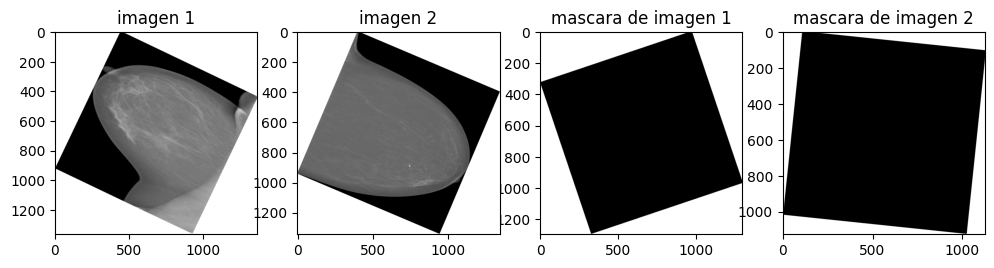

In [26]:
plt.figure(figsize=(12,12))
for i in enumerate(train_dataloader):
    imagen = i[1][0][0].squeeze()
    mascara = i[1][1][0].squeeze()
    ax = plt.subplot(2,4,i[0]+1)
    ax.title.set_text(f'imagen {i[0]+1}')
    plt.imshow(imagen, cmap='gray')
    ax = plt.subplot(2,4,i[0]+3)
    ax.title.set_text(f'mascara de imagen {i[0]+1}')
    plt.imshow(mascara, cmap='gray')
    if i[0] == 1:
        break

Feature batch shape: torch.Size([1, 1, 1138, 1138])
Labels batch shape: torch.Size([1, 1, 1400, 1400])


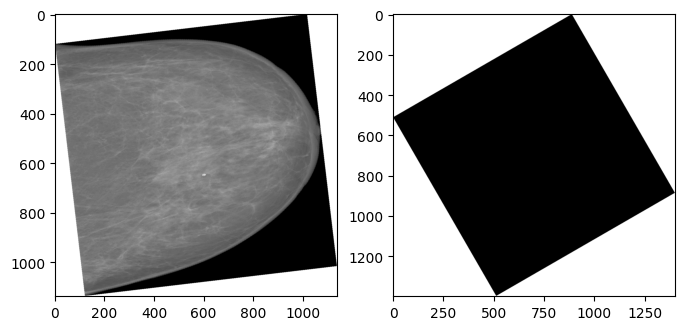

Label: tensor([[255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        ...,
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.],
        [255., 255., 255.,  ..., 255., 255., 255.]])


In [27]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0].squeeze()
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.subplot(1,2,2)
plt.imshow(label, cmap='gray')
plt.show()
print(f"Label: {label}")